# Machine Learning FTE - 35306


Professor: Ricardo Torres -- ricardo.dasilvatorres@wur.nl

We thank Yde Jansen for his valuable contributions to creation of this notebook.

Chapter 05 - Sampling Methods - Lab section

This *notebook* is adapted from contributions available at

* [An Introduction to Statistical Learning: with Applications in R... with Python!](https://botlnec.github.io/islp/sols/chapter5/exercise8/) (As of Feb. 2023).

* [Solutions for An Introduction to Statistical Learning](https://onmee.github.io/ISLR-Solutions/) (As of Feb. 2023).

* [An Introduction to Statistical Learning with Applications in PYTHON](https://github.com/qx0731/Sharing_ISL_python) (As of Feb. 2023).

Before getting started, we need to get access to the data. To do so, we clone a gitlab repository containing the data. It will make the data available in this Colab in the folder `data`.

In this lab, we explore the resampling techniques covered in this chapter. Some of the commands in this lab may take a while to run on your computer.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as stats
import statsmodels.formula.api as smf
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures


%matplotlib inline

plt.style.use('seaborn-v0_8-white')


# Lab: Cross-Validation and the Bootstrap
**First**: Read Chapter 5.

This lab has the following sections:
* The Validation Set Approach
* Leave-One-Out Cross-Validation
* k-Fold Cross-Validation
* The Bootstrap

# 5.3.1 The Validation Set Approach

We explore the use of the validation set approach in order to estimate the test error rates that result from fitting various linear models on the `Auto` data set.

Before we begin, we use the `np.random.seed()` function in order to set a  for `Python`'s random number generator, so that the reader of this book will
obtain precisely the same results as those shown below. It is generally
a good idea to set a random seed when performing an analysis such as cross-validation that contains an
element of randomness, so that the results obtained can be reproduced precisely at a later time.

We begin by preprocessing the data and splitting the set of observations into two halves, by selecting a random subset of $196$ observations out of the original $392$ observations. We  refer
to these observations as the training set.

In [9]:
np.random.seed(1)

auto = pd.read_csv('../data/islr_data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [10]:
X, y = auto.loc[:, ['horsepower']], auto.mpg

train, test = train_test_split(auto, test_size=0.5, random_state=42)

In [11]:
train

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
224,15.0,8,302.0,130.0,4295,14.9,77,1,mercury cougar brougham
373,24.0,4,140.0,92.0,2865,16.4,82,1,ford fairmont futura
131,32.0,4,71.0,65.0,1836,21.0,74,3,toyota corolla 1200
39,14.0,8,400.0,175.0,4464,11.5,71,1,pontiac catalina brougham
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
...,...,...,...,...,...,...,...,...,...
72,15.0,8,304.0,150.0,3892,12.5,72,1,amc matador (sw)
107,18.0,6,232.0,100.0,2789,15.0,73,1,amc gremlin
272,23.8,4,151.0,85.0,2855,17.6,78,1,oldsmobile starfire sx
352,29.9,4,98.0,65.0,2380,20.7,81,1,ford escort 2h


We give `train` as input to `data` argument of the `ols()` function to fit a linear regression using only the observations corresponding to the training set.

In [17]:
lm = smf.ols('mpg ~ horsepower', data=train)
lm_fit = lm.fit()

We now  use
 the `predict()` function to estimate the response for all $392$ observations,  and
 we calculate the MSE of the $196$ observations in the validation set.

In [19]:
preds = lm_fit.predict(test)

MSE = np.mean((test["mpg"] - preds)**2)
print("MSE value: {}".format(MSE))

MSE value: 25.57387818968442


In [69]:
lm2 = smf.ols('mpg~' + '+'.join(['np.power(horsepower,' + str(i) + ')' for i in [1,2]]), train)

Therefore, the estimated test MSE for the linear regression fit is $25.57$. We can use the `np.power()` function to estimate the test error for the quadratic and cubic regressions.

In [20]:
lm2 = smf.ols('mpg~' + '+'.join(['np.power(horsepower,' + str(i) + ')' for i in [1,2]]), train)
print("Lm2 results:")
print(np.mean(np.square(np.subtract(test["mpg"], lm2.fit().predict(test)))))

lm3 = smf.ols('mpg~' + '+'.join(['np.power(horsepower,' + str(i) + ')' for i in [1,2,3]]), train)
print("Lm3 results:")
print(np.mean(np.square(np.subtract(test["mpg"], lm3.fit().predict(test)))))

Lm2 results:
22.218020050038987
Lm3 results:
22.667675434959165


These error rates are $22.22$ and $22.67$, respectively.
If we choose a different training set instead, then we will obtain somewhat different errors on the validation set. Notice that we are using a different value for the `random_state` function argument this time.

In [27]:
train, test = train_test_split(auto, test_size=0.5, random_state=94)

In [28]:
train.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
117,29.0,4,68.0,49.0,1867,19.5,73,2,fiat 128
319,31.3,4,120.0,75.0,2542,17.5,80,3,mazda 626
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc
115,15.0,8,350.0,145.0,4082,13.0,73,1,chevrolet monte carlo s
206,26.5,4,140.0,72.0,2565,13.6,76,1,ford pinto


In [29]:
lm1 = smf.ols('mpg ~ horsepower', data=train)
lm1_fit = lm1.fit()

preds = lm1_fit.predict(test)

MSE = np.mean((test["mpg"] - preds)**2)
print("MSE value: {}".format(MSE))

MSE value: 25.894115886720485


In [30]:
lm2 = smf.ols('mpg~' + '+'.join(['np.power(horsepower,' + str(i) + ')' for i in [1,2]]), train)
print("Lm2 results:")
print(np.mean((test["mpg"] - lm2.fit().predict(test))**2))

lm3 = smf.ols('mpg~' + '+'.join(['np.power(horsepower,' + str(i) + ')' for i in [1,2,3]]), train)
print("Lm3 results:")
print(np.mean((test["mpg"] - lm3.fit().predict(test))**2))

Lm2 results:
18.938855673454235
Lm3 results:
19.154614102109413


Using this split of the observations into a training set and a validation set,
we find that the validation set error rates for the models with linear, quadratic, and cubic terms are $25.89$, $18.94$, and $19.15$, respectively.

These results are consistent with our previous findings: a model that predicts `mpg` using a quadratic function of `horsepower` performs better than a model that involves only a linear function of `horsepower`, and there is little evidence in favor of a model that uses a cubic function of `horsepower`.

# 5.3.2 Leave-One-Out Cross-Validation

The LOOCV estimate can be automatically computed for any generalized linear model using the `ols()` function and some addtional code.  In the lab for Chapter 4, we used the `GLM()` function to perform logistic regression by passing in  the `family = "stats.families.Binomial()"` argument.
 But if we use `GLM()` to fit a model without passing in the `family` argument, then it  performs linear regression, just like the `smf.ols()` function.
So for instance,

In [32]:
glm_fit = stats.GLM(auto["mpg"], stats.add_constant(auto["horsepower"])).fit()
glm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    mpg   No. Observations:                  392
Model:                            GLM   Df Residuals:                      390
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          24.066
Method:                          IRLS   Log-Likelihood:                -1178.7
Date:                Mon, 19 Feb 2024   Deviance:                       9385.9
Time:                        13:59:30   Pearson chi2:                 9.39e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7834
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.530      41.342
horsepower    -0.1578      0.006    -24.489      0.000      -0.170      -0.145
==============================================================================
"""

and

In [33]:
glm_fit2 = smf.ols('mpg ~ horsepower', data=auto).fit()
glm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           7.03e-81
Time:                        13:59:31   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X, y = auto["horsepower"], auto["mpg"]

loocv = LeaveOneOut()

# We get 392 splits.
loocv.get_n_splits(X)

392

In [36]:
len(auto.index)

392

In [37]:
auto.index.shape

(392,)

In [41]:
def cross_validation(formula: str = None, data: pd.DataFrame=None, n_splits: int =None) -> list:
    """
    Give the formula.
    """
    if not n_splits:
      n_splits = len(data.index)
    results = []
    for train_ind, test_ind in KFold(n_splits = n_splits).split(data):
        train, test = stats.add_constant(data.iloc[train_ind]), stats.add_constant(data.iloc[test_ind])
        
        lm_fit = smf.ols(formula, data=train).fit()
        lm_preds = lm_fit.predict(test.horsepower)
        
        results.append(mean_squared_error(test.mpg, lm_preds))
    return results  


The `cross_validation()` function produces a list with several components.  The two numbers in the `delta` vector contain the cross-validation results. In this case the numbers are identical (up to two decimal places) and correspond to the LOOCV statistic given in ( 5.1). Below, we discuss a situation in which the two numbers differ. Our cross-validation estimate for the test error is approximately $24.23$.

We can repeat this procedure for increasingly complex polynomial fits.
 To automate the process, we use the  `for` control statement to initiate a loop that iteratively fits polynomial regressions for polynomials of order $i=1$ to $i=10$, computes the associated cross-validation error, and stores it in the $i$th element of the vector `cv_error`.
 We begin by initializing the vector. 

In [42]:
cv_error = np.zeros(10)
for order in range(1, 11):
  formula = 'mpg ~ ' + '+'.join(['np.power(horsepower,' + str(i) + ')' for i in range(1,order+1)])
  cv_res = cross_validation(formula=formula, data=auto, n_splits=len(auto.index))
  cv_error[order-1] = np.asarray(cv_res).mean()

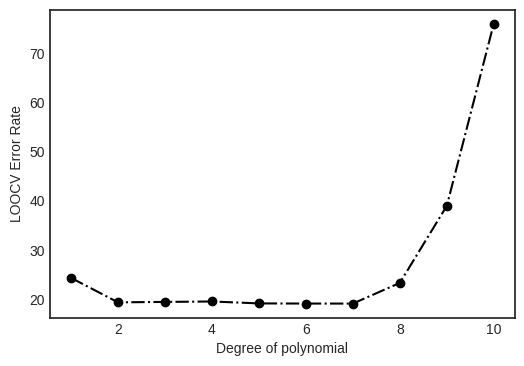

In [43]:
fig , ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(1, 11), cv_error,linestyle = '-.', marker='o',color='k');
ax.set_xlabel('Degree of polynomial');
ax.set_ylabel('LOOCV Error Rate');

As in Figure 5.4, we see a sharp drop in the estimated test MSE between the linear and quadratic fits, but then no clear improvement from using higher-order polynomials.


# 5.3.3 $k$-Fold Cross-Validation


The `cross_validation()` function can also be used to implement $k$-fold CV. Below we use $k=10$, a common choice for $k$, on the `Auto` data set.
We once again set a random seed and initialize a vector in which we will store the CV errors corresponding to the polynomial fits of orders one to ten.

In [52]:
cv_error = np.zeros(10)
for order in range(1, 11):
  formula = 'mpg ~ ' + '+'.join(['np.power(horsepower,' + str(i) + ')' for i in range(1,order+1)])
  cv_res = cross_validation(formula=formula, data=auto, n_splits=10)
  cv_error[order-1] = np.asarray(cv_res).mean()

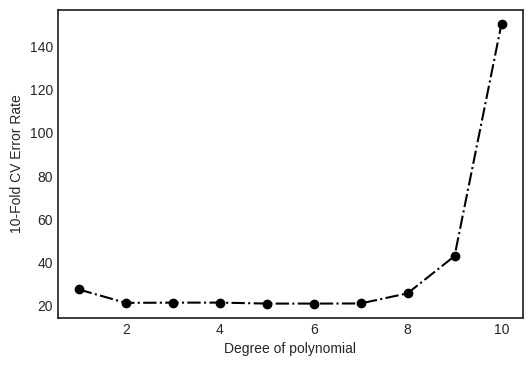

In [53]:
fig , ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(1,11), cv_error,linestyle = '-.', marker='o',color='k');
ax.set_xlabel('Degree of polynomial');
ax.set_ylabel('10-Fold CV Error Rate');

<!--- Notice that the computation time is shorter than that of LOOCV.
(In principle, the computation time for LOOCV for a least squares linear model should be faster than for $k$-fold CV, due to the availability of the formula (5.2) for LOOCV; however, unfortunately the `cv.glm()` function does not make use of this formula.)-->

We still see little evidence that using cubic or higher-order polynomial terms leads to lower test error than simply using a quadratic fit.

We saw in Section 5.3.2 that the two numbers associated with `delta` are essentially the same when LOOCV is performed.
When we instead perform $k$-fold CV, then the two numbers associated with `delta` differ slightly. The first is the standard $k$-fold CV estimate,
as in ( 5.3). The second is a bias-corrected version. On this data set, the two estimates are very similar to each other.



# 5.3.4 The Bootstrap

We illustrate the use of the bootstrap in the simple example of Section 5.2, as well as on an example involving estimating the
accuracy of the linear regression model on the `Auto` data set.

### Estimating the Accuracy of a Statistic of Interest

One of the great advantages of the bootstrap approach is that it can be
applied in almost all situations. No complicated mathematical calculations
are required. Performing a bootstrap analysis in `Python` entails only two
steps. First, we must create a function that computes the statistic of
interest. Second, we use a custom-written `boot()` function to perform the bootstrap by repeatedly
sampling observations from the data set with replacement.

The `Portfolio` data set is simulated data of $100$ pairs of returns, generated in the fashion described in Section 5.2.
To illustrate the use of the bootstrap on this data, we must first
create a function, `alpha()`, which takes as input the $(X,Y)$ data stored together in a dataframe,
as well as an integer indicating the number of samples that should be drawn from the observations and used to
estimate $\alpha$. The function then outputs the estimate for $\alpha$
based on the selected observations.

In [54]:
Portfolio = pd.read_csv('../data/islr_data/Portfolio.csv', na_values='?').dropna()

In [56]:
# We first need a function aplha to return the alpha statistic eqn. 5.7 in the text
def alpha(df, indices):
    """ 
    Returns the alpha statistic for samples of dataframe df defined by indices.
    """
    # Get X,Y
    X = df.X[indices].values
    Y = df.Y[indices].values
    
    # np.cov returns full cov matrix we need [0][1] cov(x,y)
    return (np.var(Y) - np.cov(X,Y)[0][1])/(np.var(X) + np.var(Y) - 2*np.cov(X,Y)[0][1])


This function *returns*, or outputs, an  estimate for $\alpha$ based on applying (5.7).
For instance, the following command tells `Python` to estimate $\alpha$ using
all $100$ observations.

In [57]:
alpha(Portfolio, range(0, 100))

0.5766511516104116

The next command  uses the `np.random.choice()` function to randomly select
$100$ observations from the range $1$ to $100$, with replacement. This is equivalent
to constructing a new bootstrap data set and recomputing $\hat{\alpha}$
based on the new data set.

In [58]:
np.random.seed(7)
alpha(Portfolio, np.random.choice(100, 100, replace=True))

0.5117744709121624

We can implement a bootstrap analysis by performing this command many times, recording all of
the corresponding estimates for $\alpha$, and computing the resulting
standard deviation.
However, the `boot()` function automates this approach. Below we produce $R=1,000$ bootstrap estimates for $\alpha$.


In [73]:
# Scikits.bootstrap has a bootstrap method for computing the confidence intervals of an estimated statistic but we 
# would need to calculate the SE. It's just as easy to write a quick function to compute the SE directly.

def boot(data, statsfunc, num_samples, num_bootstrap_samples=1000):
    """
    Returns the SE of the statistic returned by statsfunc when applied to data using num_bootstrap samples.
    """
    
    stat_samples = []
    for _ in range(num_bootstrap_samples):
        # apply our stats_func to generate a sample statistic
        
        indices=np.random.choice(num_samples, num_samples, replace=True)
        stat_samples.append(statsfunc(data, indices))
        #stat_samples.append(statsfunc(data))
    
    
    original_estimate = np.mean(stat_samples,axis=0)
    # compute the std of the statistic samples
    se_estimate = np.std(stat_samples,axis=0)
    

    print('\nBootstrapped Estimates =', np.round(original_estimate, 4))
    print('Bootstrapped Std. Error(s) =', np.round(se_estimate, 4))
    return np.asarray(stat_samples)

np.random.seed(0)
boot_results = boot(Portfolio, alpha, 100, 1000)


Bootstrapped Estimates = 0.5806
Bootstrapped Std. Error(s) = 0.0898


In [62]:
boot_results.sort()

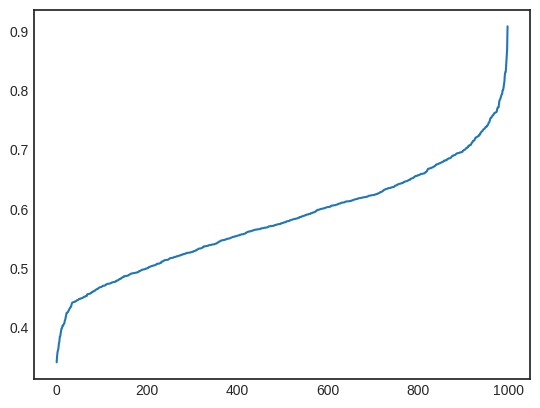

In [63]:
plt.plot(boot_results)

The final output shows that using the original data, $\hat{\alpha}=0.58$,
and that the bootstrap estimate for ${\rm SE}(\hat{\alpha})$ is $0.09$.

### Estimating the Accuracy of a Linear Regression Model

The bootstrap approach can be used  to assess the
variability of the coefficient estimates and predictions from a statistical learning method. Here we use the bootstrap approach in order to assess the variability of
the estimates for $\beta_0$ and $\beta_1$, the intercept and slope terms for the linear regression model
that uses  `horsepower` to predict `mpg` in the `Auto` data set. We will compare the estimates obtained using the bootstrap to those obtained using the formulas
for ${\rm SE}(\hat{\beta}_0)$ and ${\rm SE}(\hat{\beta}_1)$ described
in Section 3.1.2.

We first create a simple function, `auto_coeffs()`, which takes in the
`Auto` data set as well as a set of indices for the observations, and
returns the intercept and slope estimates for the linear regression model. We then apply this function
to the full set of $392$ observations in order to compute the estimates of $\beta_0$ and $\beta_1$ on the entire data set using the usual linear regression coefficient estimate
formulas from Chapter 3.

In [64]:
def auto_coeffs(data, indices):
    """
    Returns a set of fit coeffecients for the model mpg ~ horsepower using num_samples of data with replacement 
    """
    
    X = stats.add_constant(data.horsepower.iloc[indices])
    y = data.mpg.iloc[indices]
    
    results = stats.OLS(y,X).fit()
    
    return results.params

 The `auto_coeffs()` function can also be used in order to create
 bootstrap estimates for the intercept and slope terms by randomly sampling from among the observations with replacement. Here we give two examples.

In [65]:
np.random.seed(0)
print('\nA sample bootstrap estimate:\n ',auto_coeffs(auto, np.random.choice(392, 392, replace=True)))
print('\nA sample bootstrap estimate:\n ',auto_coeffs(auto, np.random.choice(392, 392, replace=True)))


A sample bootstrap estimate:
  const         40.480439
horsepower    -0.161562
dtype: float64

A sample bootstrap estimate:
  const         40.828308
horsepower    -0.163612
dtype: float64


Next, we use the `boot()` function to compute the standard errors of 1,000 bootstrap estimates for the intercept and slope terms.

In [66]:
boot_results=boot(auto, auto_coeffs, 392, num_bootstrap_samples=1000)


Bootstrapped Estimates = [39.9953 -0.1584]
Bootstrapped Std. Error(s) = [0.8529 0.0073]


This indicates that the bootstrap estimate for ${\rm SE}(\hat{\beta}_0)$ is $0.84$, and that the bootstrap estimate for ${\rm SE}(\hat{\beta}_1)$ is $0.0073$.
As discussed in Section 3.1.2, standard formulas can be used to compute the standard errors for the regression coefficients in a linear model. These can be obtained using the  `summary()` function.

In [68]:
X = stats.add_constant(auto.horsepower)
y = auto.mpg

model = stats.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           7.03e-81
Time:                        14:24:21   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

The standard error estimates for $\hat{\beta}_0$ and
$\hat{\beta}_1$ obtained using the formulas from
Section 3.1.2 are $0.717$ for the intercept and $0.0064$
for the slope. Interestingly, these are somewhat different from the
estimates obtained using the bootstrap.  Does this indicate a problem
with the bootstrap? In fact, it suggests the opposite.  Recall that
the standard formulas given in Equation 3.8 on page 66 rely on certain assumptions. For example, they depend
on the unknown parameter $\sigma^2$, the noise variance. We then estimate $\sigma^2$
using the RSS. Now although the formulas for the standard errors do not rely on the linear model
being correct, the estimate for $\sigma^2$ does.
We see in
Figure 3.8 on page 91 that there is a non-linear relationship in
the data, and so the residuals from a linear fit will be inflated, and so will $\hat{\sigma}^2$.
Secondly, the standard formulas assume (somewhat unrealistically) that the $x_i$ are fixed, and all the variability comes from the variation in the errors $\epsilon_i$.
 The bootstrap approach does not rely on any of these assumptions, and so it is
likely giving a more accurate estimate of the standard errors of
$\hat{\beta}_0$ and $\hat{\beta}_1$ than is the `summary()`
function.

Below we compute the bootstrap standard error estimates and the standard
linear regression estimates that result from fitting the quadratic model to the data. Since this model provides a good fit to the data (Figure 3.8), there is now a better correspondence between the bootstrap estimates and the standard estimates of ${\rm SE}(\hat{\beta}_0)$, ${\rm SE}(\hat{\beta}_1)$ and ${\rm SE}(\hat{\beta}_2)$.

In [33]:
def auto_coeffs(data, indices):
    """
    Returns a set of fit coeffecients for the model mpg ~ horsepower using num_samples of data with replacement 
    """
    subs = data.iloc[indices]
    results = smf.ols("mpg ~ horsepower + np.power(horsepower, 2)", data=subs).fit()

    return results.params

In [34]:
np.random.seed(0)
boot_results = boot(auto, auto_coeffs, 392, num_bootstrap_samples=1000)


Bootstrapped Estimates = [ 5.69546e+01 -4.66900e-01  1.20000e-03]
Bootstrapped Std. Error(s) = [2.0847e+00 3.3100e-02 1.0000e-04]


In [35]:
X = auto.horsepower
X = stats.add_constant(X)
X["hp2"] = np.power(X.horsepower, 2)
y = auto.mpg

model = stats.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           5.40e-99
Time:                        21:18:31   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.0